## Circular waveguide - Discussion

In [1]:
import os
import sys
import fenics as fen
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [2]:
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__')))))
from circular_waveguide import CircularWaveguide
import src.helpers as helpers

### Dimensions and properties

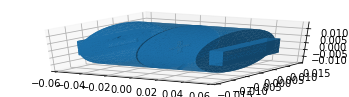

In [3]:
mesh = fen.Mesh('model/DMCWF.xml')
mesh.coordinates()[:, [0, 1, 2]] = mesh.coordinates()[:, [2, 0, 1]] * 1e-3
fen.plot(mesh)

In [4]:
Dx = (0.75 + 43.87 + 1.5 + 10) * 1e-3
Dy = (10.05) * 1e-3
Dz = (5) * 1e-3

class B_N(fen.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and fen.near(abs(x[0]), Dx) and x[1]>-Dy and x[1]<Dy and x[2]>-Dz and x[2]<Dz

class g_N_L(fen.UserExpression):
    def eval(self, value, x):
        value[0] = 1.0 if fen.near(x[0], -Dx) else 0.0
        value[1] = 0.0
        value[2] = 0.0
    def value_shape(self):
        return (3,)
    
class g_N_R(fen.UserExpression):
    def eval(self, value, x):
        value[0] = -1.0 if fen.near(x[0], Dx) else 0.0
        value[1] = 0.0
        value[2] = 0.0
    def value_shape(self):
        return (3,)

WG = CircularWaveguide(mesh, B_N, g_N=g_N_L())

### Solution of problem

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


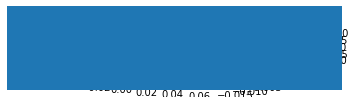

In [5]:
WG.setup()
WG.solve(1.23)
#WG.compute_solution_norm()
WG.plot_solution()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), sharex=True)
omegas = np.linspace(1.16e+10, 1.2e+10, 50)
helpers.plot_L2_norms(ax, WG, omegas)